<a href="https://colab.research.google.com/github/Shrey-Viradiya/ML/blob/master/Practicals/Practical3/Prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shrey Viradiya
# 18BCE259

In [1]:
import numpy as np
import sklearn.datasets as skd
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

### Simple Linear Regression using Equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

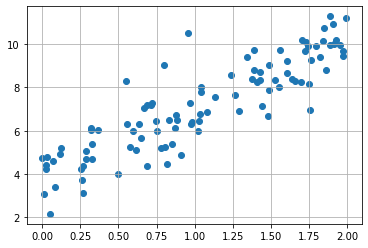

In [3]:
plt.scatter(x = X, y = y)
plt.grid()
plt.show()

Equations for computing Beta coeffs.

$$\beta_1 = \frac {\sum_{i=1}^n (x_i - \bar x )(y_i - \bar y )} {\sum_{i=1}^n (x_i - \bar x )^2} $$


$$ \beta_0 = \bar y - \beta_1 \bar x  $$

In [4]:
X_bar = np.mean(X)
y_bar = np.mean(y)

beta_1 = np.sum((X - X_bar) * (y - y_bar)) / np.sum( np.square(X - X_bar) )
beta_0 = y_bar - (beta_1 * X_bar)

print(f" y = {beta_0} + {beta_1} X")

yp = beta_1 * X + beta_0

 y = 3.936330815765777 + 3.1117369876644707 X


In [5]:
mean_absolute_error (y_true= y, y_pred= yp)

0.7921218592097429

In [6]:
mean_squared_error (y_true= y, y_pred= yp)

1.0311182014653777

**Simple and Multiple Linear Regression using Gradient
Descent & Normal Equation Method (without using
sklearn or equivalent library for both)**

### Gradient Descent

In [7]:
X, y = skd.load_boston(return_X_y=True)
X = scale(X)
X_new = np.zeros(shape=(X.shape[0], X.shape[1] + 1))
X_new[:,0] = np.ones(shape = (1,X.shape[0]))
X_new[:,1:] = X
X = X_new

In [8]:
X_train = X[:400,:]
y_train = y[:400]
X_test = X[400:,:]
y_test = y[400:]

In [9]:
# epochs
n_iter = 1000

# Learning Rate
LR = 0.03

In [10]:
a , b = X_train.shape
thetas = np.random.uniform(0,1, size = (b))

In [11]:
thetas

array([0.13306599, 0.8959683 , 0.9385092 , 0.61641641, 0.87252295,
       0.59982162, 0.48726445, 0.39889223, 0.17847168, 0.85017856,
       0.68399396, 0.64313539, 0.51093944, 0.42018273])

In [12]:
mse_history = []

In [13]:
for i in range(n_iter):
    update = np.zeros(shape=(b))
    y_predicted = np.dot(X_train, thetas)
    error = y_predicted - y_train
    for f in range(b):
        update[f] = np.sum(error * ((X_train.T)[f]))
    thetas = thetas - (LR/a) * update
    mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))

In [14]:
thetas

array([23.20665352, -1.53256103,  0.98520308,  0.20925448,  0.47341662,
       -1.62026463,  3.43584525,  0.044714  , -2.73060388,  3.46225188,
       -1.9283631 , -1.70918618,  0.1005734 , -3.71723354])

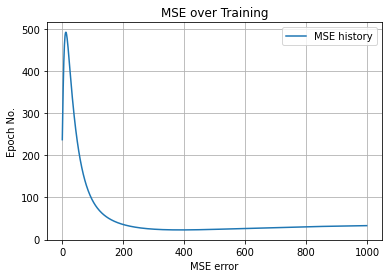

In [15]:
plt.plot(mse_history, label='MSE history')
plt.title("MSE over Training")
plt.xlabel('MSE error')
plt.ylabel('Epoch No.')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
y_tp = np.dot(X_test, thetas)

In [17]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

4.8054414639626115

In [18]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

33.19863750441366

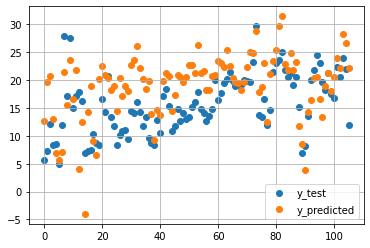

In [19]:
plt.scatter(y = y_test, x = range(len(y_test)), label = 'y_test')
plt.scatter(y = y_tp, x = range(len(y_test)), label = 'y_predicted')
plt.legend()
plt.grid(True)
plt.show()

### Normal Equation

Normal Eqaution:
$θ =(X^T X)^{-1} X^T y$

In [20]:
try:
    theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
except np.linalg.LinAlgError as err:
    theta_best = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [21]:
theta_best

array([23.28337581, -1.643388  ,  1.0305089 ,  0.37845963,  0.43550243,
       -1.73595149,  3.43080791,  0.07337369, -2.7237948 ,  4.21699484,
       -2.59301797, -1.74926608, -0.1178641 , -3.69508319])

In [22]:
y_tp = np.dot(X_test, theta_best)

In [23]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

5.142232214465217

In [24]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

37.89377859960078

### Using sklearn (for reference only)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
X, y = skd.load_boston(return_X_y=True)
X_train = X[:400,:]
y_train = y[:400]
X_test = X[400:,:]
y_test = y[400:]

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.intercept_

28.6725995908559

In [29]:
model.coef_

array([-1.91246374e-01,  4.42289967e-02,  5.52207977e-02,  1.71631351e+00,
       -1.49957220e+01,  4.88773025e+00,  2.60921031e-03, -1.29480799e+00,
        4.84787214e-01, -1.54006673e-02, -8.08795026e-01, -1.29230427e-03,
       -5.17953791e-01])

In [30]:
thetas

array([23.20665352, -1.53256103,  0.98520308,  0.20925448,  0.47341662,
       -1.62026463,  3.43584525,  0.044714  , -2.73060388,  3.46225188,
       -1.9283631 , -1.70918618,  0.1005734 , -3.71723354])

In [31]:
y_tp = model.predict(X_test)

In [32]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

5.142232214465271

In [33]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

37.893778599601866

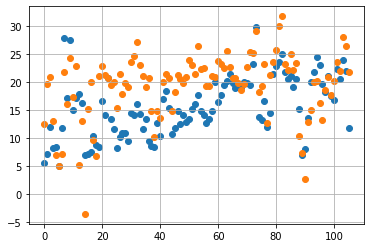

In [34]:
plt.scatter(y = y_test, x = range(len(y_test)))
plt.scatter(y = y_tp, x = range(len(y_test)))
plt.grid(True)
plt.show()